<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜GUIDE FOR CLASSIFICATION PROBLEM📜 </div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2 style="color: #17a2b8; font-size: 24px; font-weight: bold; margin-bottom: 10px;">Let's get started!</h2>
    <p>When dealing with machine learning problems, there are generally two types of data (and machine learning models):</p>
    <ul>
      <li><strong>Supervised data:</strong> always has one or multiple targets associated with it.</li>
      <li><strong>Unsupervised data:</strong> does not have any target variable.</li>
    </ul>
    <p>A supervised problem is considerably easier to tackle than an unsupervised one. A problem in which we are required to predict a value is known as a supervised problem. For example:</p>
    <ul>
      <li>If the problem is to predict house prices given historical house prices, with features like presence of a hospital, school or supermarket, distance to nearest public transport, etc., it is a supervised problem.</li>
      <li>Similarly, when we are provided with images of cats and dogs, and we know beforehand which ones are cats and which ones are dogs, and if the task is to create a model which predicts whether a provided image is of a cat or a dog, the problem is considered to be supervised.</li>
    </ul>
    <p>Here in this Dataset we have a Supervised Machine Learning Problem, For Heart Failure Prediction.</p>
  </div>
</div>


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📚IMPORTING LIBRARIES📚 </div>

In [1]:
import os
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib 
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

<div class="text_cell_render border-box-sizing rendered_html">
<div class="alert alert-block alert-success" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #4CAF50; background-color: #E6F7E2;">
    <b>📂 Libraries:</b> Successfully import the recquired library
</div>
</div>

<img src="https://regencyhealthcare.in/wp-content/uploads/2022/01/Jan5.jpg">



<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help
  </div>
</div>

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜Dataset Reading & Sample📜 </div>

In [2]:
df=pd.read_csv("/kaggle/input/heart-failure-prediction-dataset/heart.csv")
df.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
490,72,M,NAP,120,214,0,Normal,102,Y,1.000000,Flat,1
309,57,M,ASY,95,0,1,Normal,182,N,0.700000,Down,1
384,54,M,ASY,120,0,0,Normal,155,N,0.000000,Flat,1
289,36,M,ATA,120,166,0,Normal,180,N,0.000000,Up,0
751,67,F,NAP,152,277,0,Normal,172,N,0.000000,Up,0
0,40,M,ATA,140,289,0,Normal,172,N,0.000000,Up,0
901,58,F,ASY,170,225,1,LVH,146,Y,2.800000,Flat,1
186,58,M,ATA,130,251,0,Normal,110,N,0.000000,Up,0
132,56,M,ASY,170,388,0,ST,122,Y,2.000000,Flat,1
220,46,M,ASY,130,222,0,Normal,112,N,0.000000,Flat,1


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.
  </div>
</div>

In [3]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
As we can see the string data in the dataframe is in the form of object, we need to convert it back to string to work on it

  </div>
</div>

In [4]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

In [5]:
df.dtypes

Age                        int64
Sex               string[python]
ChestPainType     string[python]
RestingBP                  int64
Cholesterol                int64
FastingBS                  int64
RestingECG        string[python]
MaxHR                      int64
ExerciseAngina    string[python]
Oldpeak                  float64
ST_Slope          string[python]
HeartDisease               int64
dtype: object

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
So, as we can see here the object data has been converted to string



  </div>
</div>

## Getting the categorical columns 

In [6]:
string_col=df.select_dtypes("string").columns.to_list()

In [7]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 📜DATA DESCRIPTION📜 </div>

In [8]:
df.describe().T.style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,count,mean,std,min,25%,50%,75%,max
Age,918.000000,53.510893,9.432617,28.000000,47.000000,54.000000,60.000000,77.000000
RestingBP,918.000000,132.396514,18.514154,0.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,918.000000,198.799564,109.384145,0.000000,173.250000,223.000000,267.000000,603.000000
FastingBS,918.000000,0.233115,0.423046,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,918.000000,136.809368,25.460334,60.000000,120.000000,138.000000,156.000000,202.000000
Oldpeak,918.000000,0.887364,1.066570,-2.600000,0.000000,0.600000,1.500000,6.200000
HeartDisease,918.000000,0.553377,0.497414,0.000000,0.000000,1.000000,1.000000,1.000000


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾ATTRIBUTES INCLUDE🧾 </div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    
- Age: age of the patient [years]<br><br>
      
- Sex: sex of the patient [M: Male, F: Female]<br><br>
      
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]<br><br>
      
- RestingBP: resting blood pressure [mm Hg]<br><br>
      
- Cholesterol: serum cholesterol [mm/dl]<br><br>
      
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]<br><br>
      
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]<br><br>
      
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]<br><br>
      
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br><br>
      
- Oldpeak: oldpeak = ST [Numeric value measured in depression]<br><br>
      
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]<br><br>
      
- HeartDisease: output class [1: heart disease, 0: Normal]
  </div>
</div>


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🧾EXPLORATORY DATA ANALYSIS🧾 </div>

<img src="https://media.licdn.com/dms/image/D4D12AQEtm6_thHS9sQ/article-cover_image-shrink_720_1280/0/1682185054902?e=2147483647&v=beta&t=2A1q8nPUiify2S0nTtgADUW5xJaJICj7MmQuH7lEXXg">

## First Question should be why do we need this ??

Out Come of this phase is as given below : 

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    
- Understanding the given dataset and helps clean up the given dataset. <br><br>
- It gives you a clear picture of the features and the relationships between them. <br><br>
- Providing guidelines for essential variables and leaving behind/removing non-essential variables. <br><br>
- Handling Missing values or human error. <br><br>
- Identifying outliers. <br><br>
- EDA process would be maximizing insights of a dataset. <br><br>
- This process is time-consuming but very effective.

  </div>
</div>


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🔥CORRELATION MATRIX🔥 </strong></div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    
It's necessary to remove correlated variables to improve your model. <br><br>
One can find correlations using pandas “.corr()” function and can visualize the correlation matrix using plotly express.
<br><br>
- Lighter shades represent positive correlation <br>
- Darker shades represent negative correlation

  </div>
</div>


In [9]:
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix using plotly
fig = px.imshow(correlation_matrix, text_auto=True, title="Correlation Plot of the Heart Failure Prediction", aspect="auto")
fig.show()

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    Here we can see Heart Disease has a high negative correlation with "MaxHR" and somewhat negative correlation with "Cholesterol", whereas there is a positive correlation with "Oldpeak", "FastingBS" and "RestingBP".
  </div>
</div>


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>📈 DISTRIBUTION 📈 </strong></div>

In [10]:
# Shows the Distribution of Heat Diseases with respect to male and female
fig=px.histogram(df, 
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

In [11]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain"
                )
fig.show()

In [12]:
fig=px.histogram(df,
                 x="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio in the Data")
fig.show()

In [13]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG")
fig.show()

To plot multiple pairwise bivariate distributions in a dataset, you can use the pairplot() function. This shows the relationship for (n, 2) combination of variable in a DataFrame as a matrix of plots and the diagonal plots are the univariate plots.

[]

<Figure size 1500x1000 with 0 Axes>

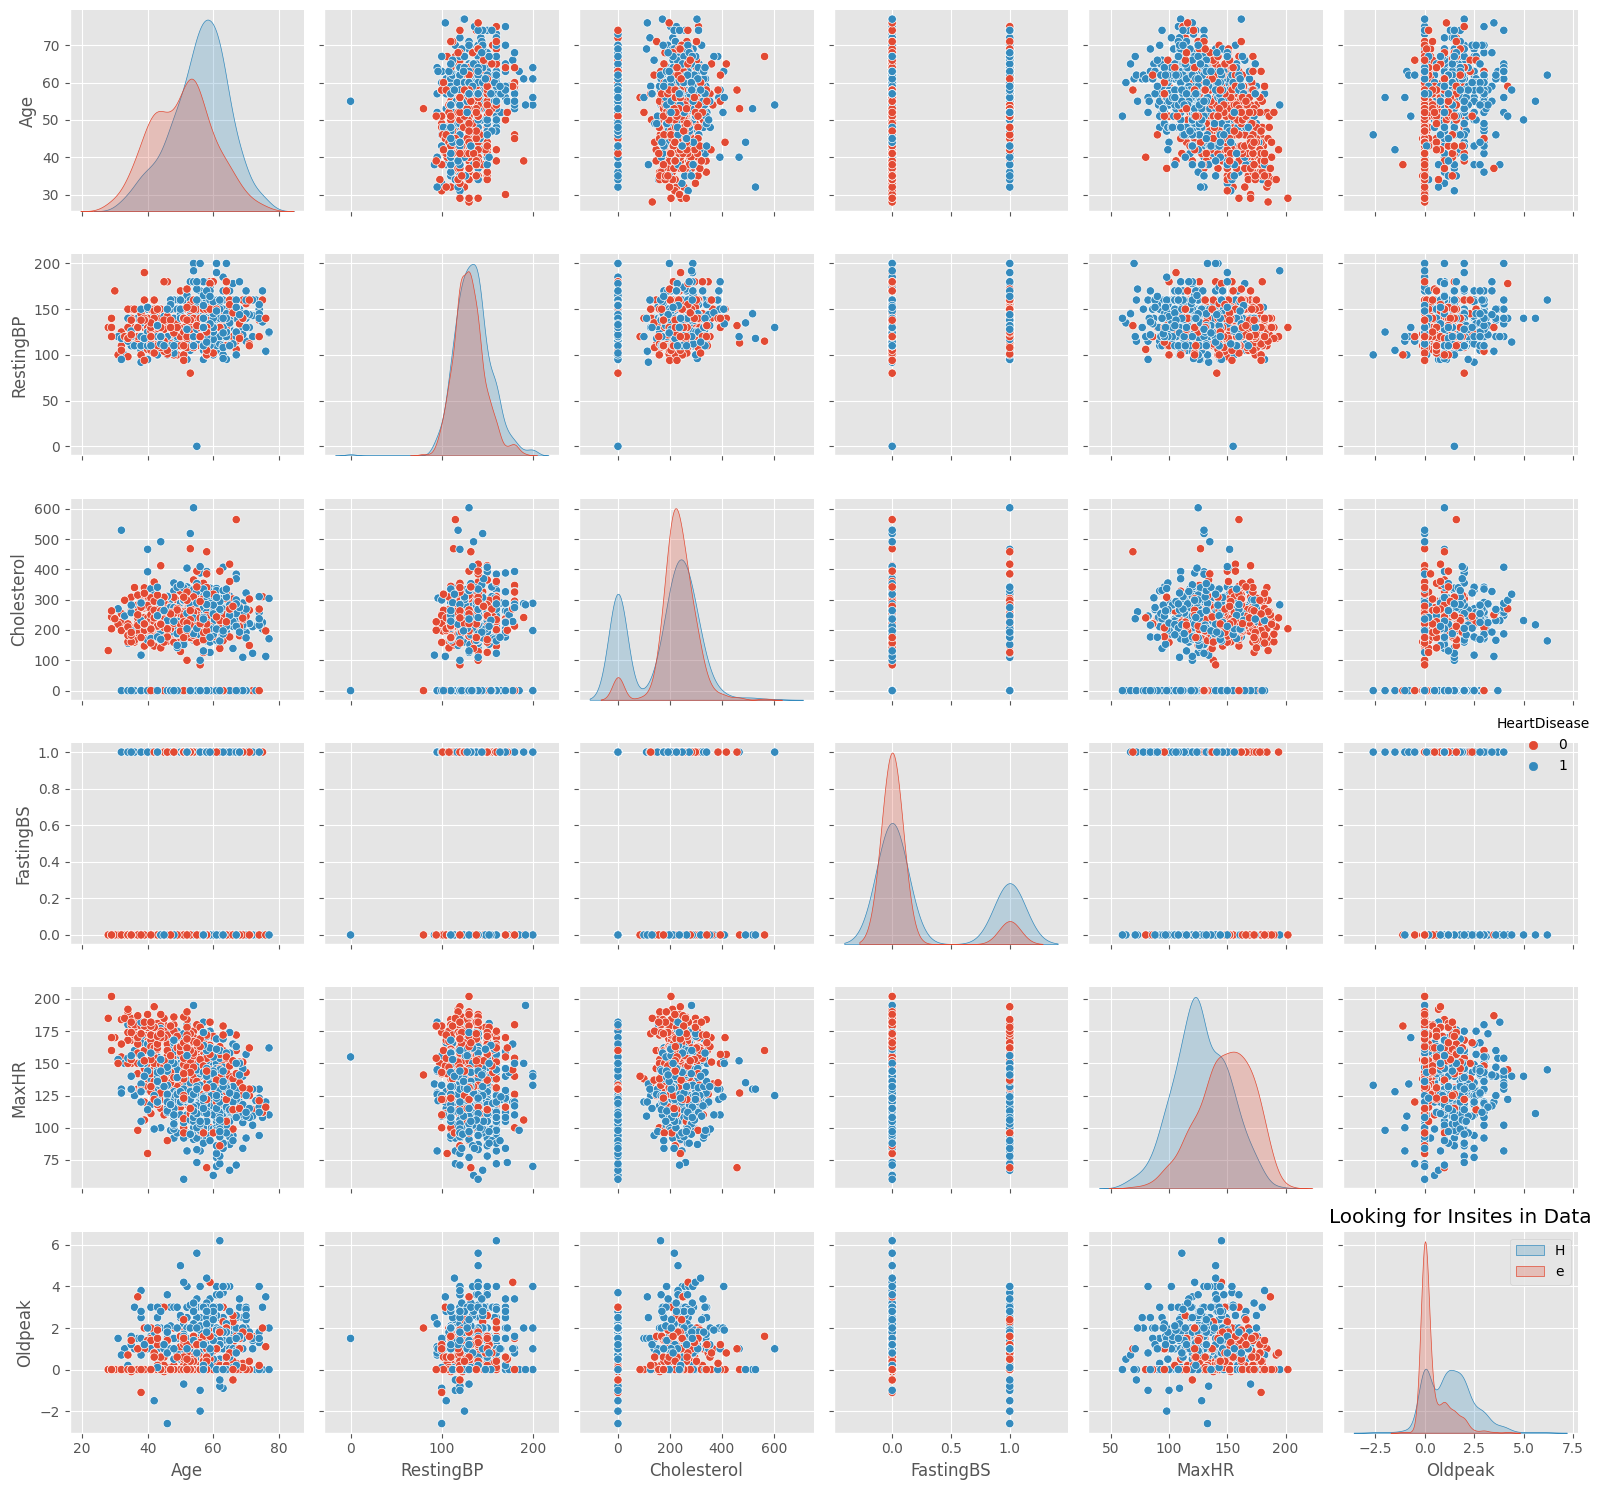

In [14]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

### Now to check the linearity of the variables it is a good practice to plot distribution graph and look for skewness of features. Kernel density estimate (kde) is a quite useful tool for plotting the shape of a distribution.

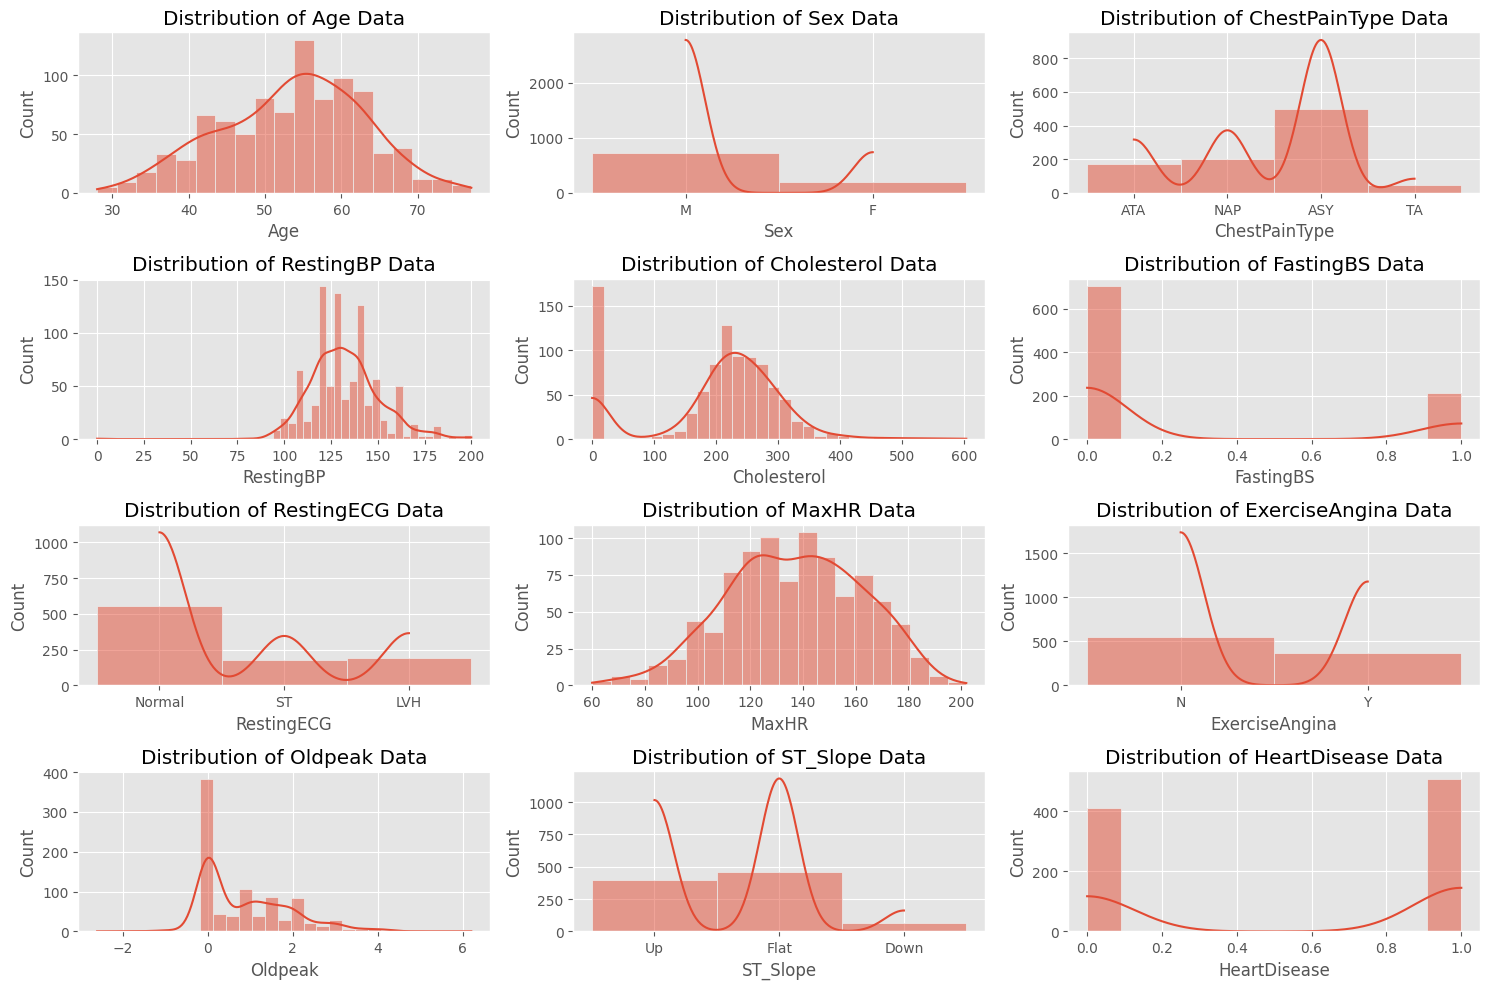

In [15]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    


<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🔍OUTLIERS🔍 </div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables. <br><br>
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. <br><br>
The box plot (a.k.a. box and whisker diagram) is a standardized way of displaying the distribution of data based on the five number summary:
<br><br>
- Minimum <br>
- First quartile <br>
- Median <br>
- Third quartile <br>
- Maximum.
<br><br>
In the simplest box plot, the central rectangle spans the first quartile to the third quartile (the interquartile range or IQR). <br><br>
A segment inside the rectangle shows the median, and “whiskers” above and below the box show the locations of the minimum and maximum.

  </div>
</div>


In [16]:

fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age")
fig.show()

In [17]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP",color="Sex")
fig.show()

In [18]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distrubution of Cholesterol")
fig.show()

In [19]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distrubution of Oldpeak")
fig.show()

In [20]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distrubution of MaxHR")
fig.show()

<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);"> 🛠DATA PREPROCESSING🛠 </div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    
Data preprocessing is an integral step in Machine Learning as the quality of data and the useful information that can be derived from it directly affects the ability of our model to learn; therefore, it is extremely important that we preprocess our data before feeding it into our model.
<br><br>
The concepts that I will cover in this article are:
<br><br>
1. Handling Null Values
<br>
2. Feature Scaling
<br>
3. Handling Categorical Variables
<br><br>
  </div>
</div>


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🔍HANDLING NULL VALUES🔍 </strong></div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
In any real-world dataset, there are always few null values. It doesn’t really matter whether it is a regression, classification or any other kind of problem, no model can handle these NULL or NaN values on its own so we need to intervene.

<br><br>
      
> In python NULL is reprsented with NaN. So don’t get confused between these two,they can be used interchangably.

  </div>
</div>


In [21]:
# Checking for Type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [22]:
# Checking for NULLs in the data
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <p>So we can see our data does not have any null values, but in case we have missing values, we can handle them using imputation.</p>
    <p>However, it is not the best option to remove the rows and columns from our dataset as it can result in significant information loss. If you have 300K data points then removing 2–3 rows won’t affect your dataset much but if you only have 100 data points and out of which 20 have NaN values for a particular field then you can’t simply drop those rows. In real-world datasets, it can happen quite often that you have a large number of NaN values for a particular field.</p>
    <p>For example, suppose we are collecting data from a survey, then it is possible that there could be an optional field which let’s say 20% of people left blank. So when we get the dataset then we need to understand that the remaining 80% of data is still useful, so rather than dropping these values we need to somehow substitute the missing 20% values. We can do this with the help of Imputation.</p>
    <h3>Imputation:</h3>
    <p>Imputation is simply the process of substituting the missing values of our dataset. We can do this by defining our own customised function or we can simply perform imputation by using the SimpleImputer class provided by sklearn.</p>
    <p>For example:</p>
    <pre><code>from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[['Weight']])
df['Weight'] = imputer.transform(df[['Weight']])
    </code></pre>
    <p>As we do not have any missing data in our current dataset, we will not be using this approach.</p>
  </div>
</div>


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🔥FEATURE SCALING🔥 </strong></div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h3>Why Should we Use Feature Scaling?</h3>
    <p>The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.</p>
    <h2>1. Distance Based Algorithms:</h2>
    <p>Distance algorithms like <strong>"KNN"</strong>, <strong>"K-means"</strong>, and <strong>"SVM"</strong> are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.</p>
    <p>When two features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biased towards one feature.</p>
    <p>Therefore, we scale our data before employing a distance-based algorithm so that all the features contribute equally to the result.</p>
    <img src="https://miro.medium.com/max/1000/0*MZKG8sTIdSNv6TXB" width="50%">
    <h2>2. Tree-Based Algorithms:</h2>
    <p>Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features. Think about it, a decision tree is only splitting a node based on a single feature. The decision tree splits a node on a feature that increases the homogeneity of the node. This split on a feature is not influenced by other features.</p>
    <p>So, there is virtually no effect of the remaining features on the split. This is what makes them invariant to the scale of the features!</p>
    <img src="https://miro.medium.com/max/925/0*U0rcW7XrdHpvI0hU.jpeg" width="70%">
  </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h3>What is Normalization?</h3>
    <p>Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.</p>
    <p>Here's the formula for normalization:</p>
    <img src="https://i.stack.imgur.com/EuitP.png" width="40%">
    <p>Here, Xmax and Xmin are the maximum and the minimum values of the feature respectively.</p>
    <p>When the value of X is the minimum value in the column, the numerator will be 0, and hence X’ is 0.</p>
    <p>On the other hand, when the value of X is the maximum value in the column, the numerator is equal to the denominator and thus the value of X’ is 1.</p>
    <p>If the value of X is between the minimum and the maximum value, then the value of X’ is between 0 and 1.</p>
  </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>What is Standardization?</h2>
    <p>Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.</p>
    <p>Here's the formula for Standardization:</p>
    <img src="https://clavelresearch.files.wordpress.com/2019/03/z-score-population.png" width="30%">
    <h2>The Big Question – Normalize or Standardize?</h2>
    <p>Normalization vs. standardization is an eternal question among machine learning newcomers. Let me elaborate on the answer in this section.</p>
    <ul>
      <li>Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.</li>
      <li>Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.</li>
    </ul>
    <p>However, at the end of the day, the choice of using normalization or standardization will depend on your problem and the machine learning algorithm you are using. There is no hard and fast rule to tell you when to normalize or standardize your data.</p>
  </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h3>Robust Scaler</h3>
    <p>When working with outliers we can use Robust Scaling for scaling our data. It scales features using statistics that are robust to outliers. This method removes the median and scales the data in the range between 1st quartile and 3rd quartile, i.e., in between 25th quantile and 75th quantile range. This range is also called an Interquartile range.<br><br>The median and the interquartile range are then stored so that they could be used upon future data using the transform method. If outliers are present in the dataset, then the median and the interquartile range provide better results and outperform the sample mean and variance.<br><br>RobustScaler uses the interquartile range so that it is robust to outliers.</p>
  </div>
</div>


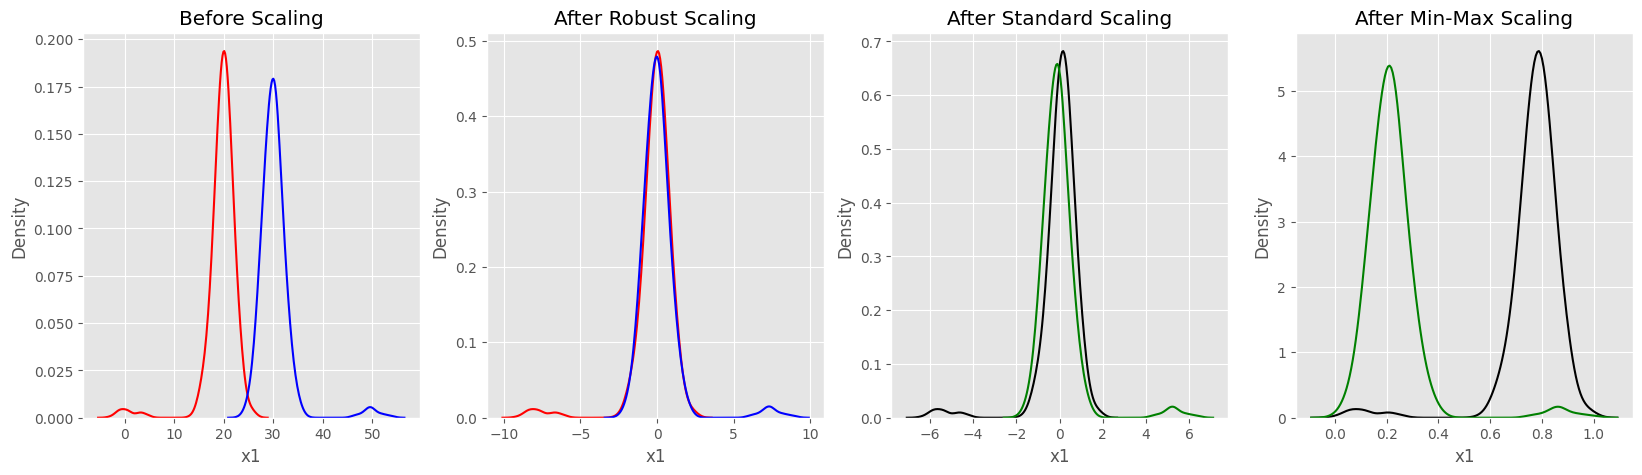

In [23]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🧾HANDLING CATEGORICAL VARIABLE🧾 </strong></div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <p>Categorical variables/features can be classified into two major types:</p>
    <ul>
      <li><strong>Nominal:</strong> Variables that have two or more categories which do not have any kind of order associated with them. For example, gender (male/female) is a nominal variable.</li>
      <li><strong>Ordinal:</strong> Variables with levels or categories with a particular order associated with them. For example, a feature with three different levels: low, medium, and high.</li>
    </ul>
    <p>In binary classification problems like this, where the target is not skewed, the best metric to use would be Area Under the ROC Curve (AUC). AUC combines precision and recall metrics.</p>
    <p>To convert categorical data into numerical format, we typically use techniques like:</p>
    <ul>
      <li><strong>Label Encoding:</strong> Useful for tree-based machine learning algorithms.</li>
      <li><strong>One-Hot Encoding:</strong> Suitable for non-tree-based machine learning algorithms.</li>
    </ul>
    <p>For tree-based algorithms, Label Encoding is preferred as it preserves the ordinality of the data. However, for non-tree-based algorithms, One-Hot Encoding is recommended as it produces binary features and avoids ordinality issues.</p>
  </div>
</div>


In [24]:
df[string_col].head()
for col in string_col:
    print(f"The distribution of categorical valeus in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical valeus in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: Int64
The distribution of categorical valeus in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: Int64
The distribution of categorical valeus in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: Int64
The distribution of categorical valeus in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: Int64
The distribution of categorical valeus in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: Int64


In [25]:
# As we will be using both types of approches for demonstration lets do First Label Ecoding 
# which will be used with Tree Based Algorthms
df_tree = df.apply(LabelEncoder().fit_transform)
df_tree.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
22,21,0,1,25,59,0,1,90,0,10,2,0
550,27,1,0,59,118,0,1,7,0,30,1,1
225,22,1,0,46,122,0,1,76,0,10,1,1
310,37,1,0,52,0,0,1,80,0,20,2,0
455,31,1,0,51,0,0,2,57,1,25,2,0
667,37,0,2,41,213,1,0,83,0,18,2,0
548,38,1,0,15,119,0,1,66,0,25,2,1
431,34,1,0,22,78,0,2,14,0,10,2,0
406,29,1,0,41,0,1,1,27,1,10,1,1
9,20,0,1,22,142,0,1,46,0,10,2,0


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <p>We can use this encoding directly in many tree-based models:</p>
    <ul>
      <li>Decision trees</li>
      <li>Random forest</li>
      <li>Extra Trees</li>
      <li>Or any kind of boosted trees model
        <ul>
          <li>XGBoost</li>
          <li>GBM</li>
          <li>LightGBM</li>
        </ul>
      </li>
    </ul>
    <p>This type of encoding cannot be used in linear models, support vector machines, or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data.</p>
  </div>
</div>


In [26]:
## Creaeting one hot encoded features for working with non tree based algorithms 
df_nontree=pd.get_dummies(df,columns=string_col,drop_first=False)
df_nontree.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
880,52,172,199,1,162,0.500000,0,False,True,False,False,True,False,False,True,False,True,False,False,False,True
369,63,150,0,0,86,2.000000,1,False,True,True,False,False,False,False,True,False,False,True,False,True,False
573,72,160,123,1,130,1.500000,1,False,True,True,False,False,False,True,False,False,True,False,False,True,False
516,68,150,195,1,132,0.000000,1,False,True,False,False,True,False,False,True,False,True,False,False,True,False
334,51,130,0,1,170,-0.700000,1,False,True,True,False,False,False,False,True,False,True,False,False,False,True
859,51,140,308,0,142,1.500000,0,True,False,False,False,True,False,True,False,False,True,False,False,False,True
570,56,128,223,0,119,2.000000,1,False,True,True,False,False,False,False,False,True,False,True,True,False,False
421,66,120,0,0,120,-0.500000,0,False,True,False,False,True,False,False,False,True,True,False,False,False,True
648,59,170,326,0,140,3.400000,1,False,True,True,False,False,False,True,False,False,False,True,True,False,False
327,59,125,0,1,119,0.900000,1,False,True,True,False,False,False,False,True,False,False,True,False,False,True


In [27]:
# Getting the target column at the end
target="HeartDisease"
y=df_nontree[target].values
df_nontree.drop("HeartDisease",axis=1,inplace=True)
df_nontree=pd.concat([df_nontree,df[target]],axis=1)
df_nontree.sample(10).style.set_properties(**{'background-color': '#f9f9f9', 'color': '#4CAF50', 'font-weight': 'bold'})

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
290,48,110,211,0,138,0.000000,False,True,False,False,True,False,False,True,False,True,False,False,False,True,0
132,56,170,388,0,122,2.000000,False,True,True,False,False,False,False,False,True,False,True,False,True,False,1
911,59,164,176,1,90,1.000000,False,True,True,False,False,False,True,False,False,True,False,False,True,False,1
118,35,120,160,0,185,0.000000,True,False,False,False,False,True,False,False,True,True,False,False,False,True,0
436,58,116,0,0,124,1.000000,False,True,True,False,False,False,False,True,False,True,False,False,False,True,1
551,62,120,220,0,86,0.000000,False,True,False,False,True,False,True,False,False,True,False,False,False,True,0
287,53,120,181,0,132,0.000000,False,True,False,True,False,False,False,True,False,True,False,False,False,True,0
128,54,120,230,1,140,0.000000,True,False,False,True,False,False,False,True,False,True,False,False,False,True,0
519,63,96,305,0,121,1.000000,False,True,True,False,False,False,False,False,True,False,True,False,False,True,1
0,40,140,289,0,172,0.000000,False,True,False,True,False,False,False,True,False,True,False,False,False,True,0


<div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🔍Chossing the right Cross-Validation🔍 </strong></div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <p>Choosing the right cross-validation depends on the dataset you are dealing with, and one’s choice of cross-validation on one dataset may or may not apply to other datasets. However, there are a few types of cross-validation techniques which are the most popular and widely used. These include:</p>
    <ul>
      <li>k-fold cross-validation</li>
      <li>stratified k-fold cross-validation</li>
    </ul>
    <p>Cross-validation is dividing training data into a few parts. We train the model on some of these parts and test on the remaining parts</p>
    <h2>1. K-fold cross-validation :</h2>
    <p>As you can see, we divide the samples and the targets associated with them. We can divide the data into k different sets which are exclusive of each other. This is known as k-fold cross-validation, We can split any data into k-equal parts using KFold from scikit-learn. Each sample is assigned a value from 0 to k-1 when using k-fold cross validation.</p>
    <h2>2. Stratified k-fold cross-validation :</h2>
    <p>If you have a skewed dataset for binary classification with 90% positive samples and only 10% negative samples, you don't want to use random k-fold cross-validation. Using simple k-fold cross-validation for a dataset like this can result in folds with all negative samples. In these cases, we prefer using stratified k-fold cross-validation. Stratified k-fold cross-validation keeps the ratio of labels in each fold constant. So, in each fold, you will have the same 90% positive and 10% negative samples. Thus, whatever metric you choose to evaluate, it will give similar results across all folds.</p>
  </div>
</div>


 
<div style="color:#FF5733; background-color:#F7DC6F; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🧬TRAINING OUR ML-MODEL🧬 </div>

 <div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🧾NON-TREE BASED ALGORITHMS🧾 </strong></div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>1. Using Logistic Regression :</h2>
    <p>Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.</p>
    <p>Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:</p>
    <p>P(Y=1|X) or P(Y=0|X)</p>
    <p>It calculates the probability of dependent variable Y, given independent variable X.</p>
    <p>This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 1.</p>
    <img src="https://static.javatpoint.com/tutorial/machine-learning/images/logistic-regression-in-machine-learning.png" alt="Logistic Regression" width="70%">
  </div>
</div>


In [28]:
feature_col_nontree=df_nontree.columns.to_list()
feature_col_nontree.remove(target)

In [29]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        82
           1       0.93      0.83      0.88       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184

The accuracy for Fold 1 : 0.8800813008130083
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for Fold 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                       

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>2. Using Naive Bayes</h2>
    <img src="https://insightimi.files.wordpress.com/2020/04/unnamed-1.png" alt="Naive Bayes" width="70%">
  </div>
</div>


In [30]:
from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        82
           1       0.93      0.79      0.86       102

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

The accuracy for 1 : 0.8604734576757532
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        82
           1       0.93      0.85      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

The accuracy for 2 : 0.8837876614060258
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.63      0.76        82
           1       0.77      0.98      0.86       102

    accuracy                           0.83  

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>3. Using SVM (Support Vector Machines)</h2>
    <p>A support vector machine (SVM) uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.</p>
    <p>For a simple visual explanation, we’ll use two tags: red and blue, with two data features: X and Y, then train our classifier to output an X/Y coordinate as either red or blue.</p>
    <img src="https://monkeylearn.com/static/93a102a9b7b96d9047212e15b627724b/d8712/image4-3.webp" alt="SVM Visualization" width="40%">
    <p>The SVM then assigns a hyperplane that best separates the tags. In two dimensions, this is simply a line. Anything on one side of the line is red and anything on the other side is blue. In sentiment analysis, for example, this would be positive and negative.</p>
    <p>In order to maximize machine learning, the best hyperplane is the one with the largest distance between each tag:</p>
    <img src="https://monkeylearn.com/static/e662f65502ffd24d3ee23c07efe88d9e/d8712/image3-2.webp" alt="Best Hyperplane" width="40%">
    <p>However, as data sets become more complex, it may not be possible to draw a single line to classify the data into two camps:</p>
    <img src="https://monkeylearn.com/static/5db2d9178789315ce9fa42f579c895a6/93a24/image2-3.webp" alt="Complex Data" width="40%">
    <p>Using SVM, the more complex the data, the more accurate the predictor will become. Imagine the above in three dimensions, with a Z-axis added, so it becomes a circle.</p>
    <p>Mapped back to two dimensions with the best hyperplane, it looks like this:</p>
    <img src="https://monkeylearn.com/static/583405ebadf21c9691030ec4bb875e48/93a24/image6-2.webp" alt="Mapped Hyperplane" width="40%">
    <p>SVM allows for more accurate machine learning because it’s multidimensional.</p>
    <p>We need to choose the best Kernel according to our need:</p>
    <ul>
      <li>The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.</li>
      <li>Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.</li>
      <li>Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.</li>
      <li>Polynomial kernels give good results for problems where all the training data is normalized.</li>
    </ul>
  </div>
</div>


In [31]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.81      0.91      0.86        82
           1       0.92      0.82      0.87       102

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

The accuracy for 1 : 0.8690817790530847
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.77        82
           1       0.78      0.98      0.87       102

    accuracy                           0.83  

In [32]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        82
           1       0.87      0.86      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

The accuracy for 1 : 0.852104256336681
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        82
           1       0.80      0.75      0.77       102

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184

The accuracy for 2 : 0.7566953610712578
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        82
           1       0.81      0.89      0.85       102

    accuracy                           0.82   

In [33]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        82
           1       0.91      0.93      0.92       102

    accuracy                           0.91       184
   macro avg       0.91      0.91      0.91       184
weighted avg       0.91      0.91      0.91       184

The accuracy for 1 : 0.9108082257293162
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.89      0.70      0.78        82
           1       0.79      0.93      0.86       102

    accuracy                           0.83  

In [34]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.87      0.90      0.89        82
           1       0.92      0.89      0.91       102

    accuracy                           0.90       184
   macro avg       0.89      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184

The accuracy for 1 : 0.897297943567671
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        82
           1       0.91      0.78      0.84       102

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8433763749402199
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.93      0.63      0.75        82
           1       0.77      0.96      0.85       102

    accuracy                           0.82   

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>Using K-nearest Neighbors</h2>
    <p>The optimal K value usually found is the square root of N, where N is the total number of samples</p>
    <p>K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.</p>
    <p>When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.</p>
    <img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png" alt="K-nearest Neighbors" width="100%">
  </div>
</div>


In [35]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_nontree,y=y)):
    
    X_train=df_nontree.loc[trn_,feature_col_nontree]
    y_train=df_nontree.loc[trn_,target]
    
    X_valid=df_nontree.loc[val_,feature_col_nontree]
    y_valid=df_nontree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        82
           1       0.93      0.93      0.93       102

    accuracy                           0.92       184
   macro avg       0.92      0.92      0.92       184
weighted avg       0.92      0.92      0.92       184

The accuracy for 1 : 0.9230033476805357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        82
           1       0.91      0.79      0.85       102

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8482783357245336
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        82
           1       0.81      0.95      0.87       102

    accuracy                           0.85  

 <div style="color:white; background-color:#FF5733; padding: 15px; border-radius: 10px; font-size: 150%; font-family: Arial, sans-serif; text-align:center; box-shadow: 0px 4px 6px rgba(0, 0, 0, 1);"><strong>🧾TREE BASED ALGORITHMS🧾 </strong></div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>Using Decision Tree Classifier</h2>
    <p>A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.</p>
  </div>
</div>


In [36]:
feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)

In [37]:
from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        82
           1       0.85      0.65      0.73       102

    accuracy                           0.74       184
   macro avg       0.75      0.75      0.74       184
weighted avg       0.76      0.74      0.74       184

The accuracy for 1 : 0.7503586800573888
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.66      0.88      0.75        82
           1       0.87      0.64      0.73       102

    accuracy                           0.74       184
   macro avg       0.76      0.76      0.74       184
weighted avg       0.77      0.74      0.74       184

The accuracy for 2 : 0.7576518412242945
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.86      0.62      0.72        82
           1       0.75      0.92      0.83       102

    accuracy                           0.79  

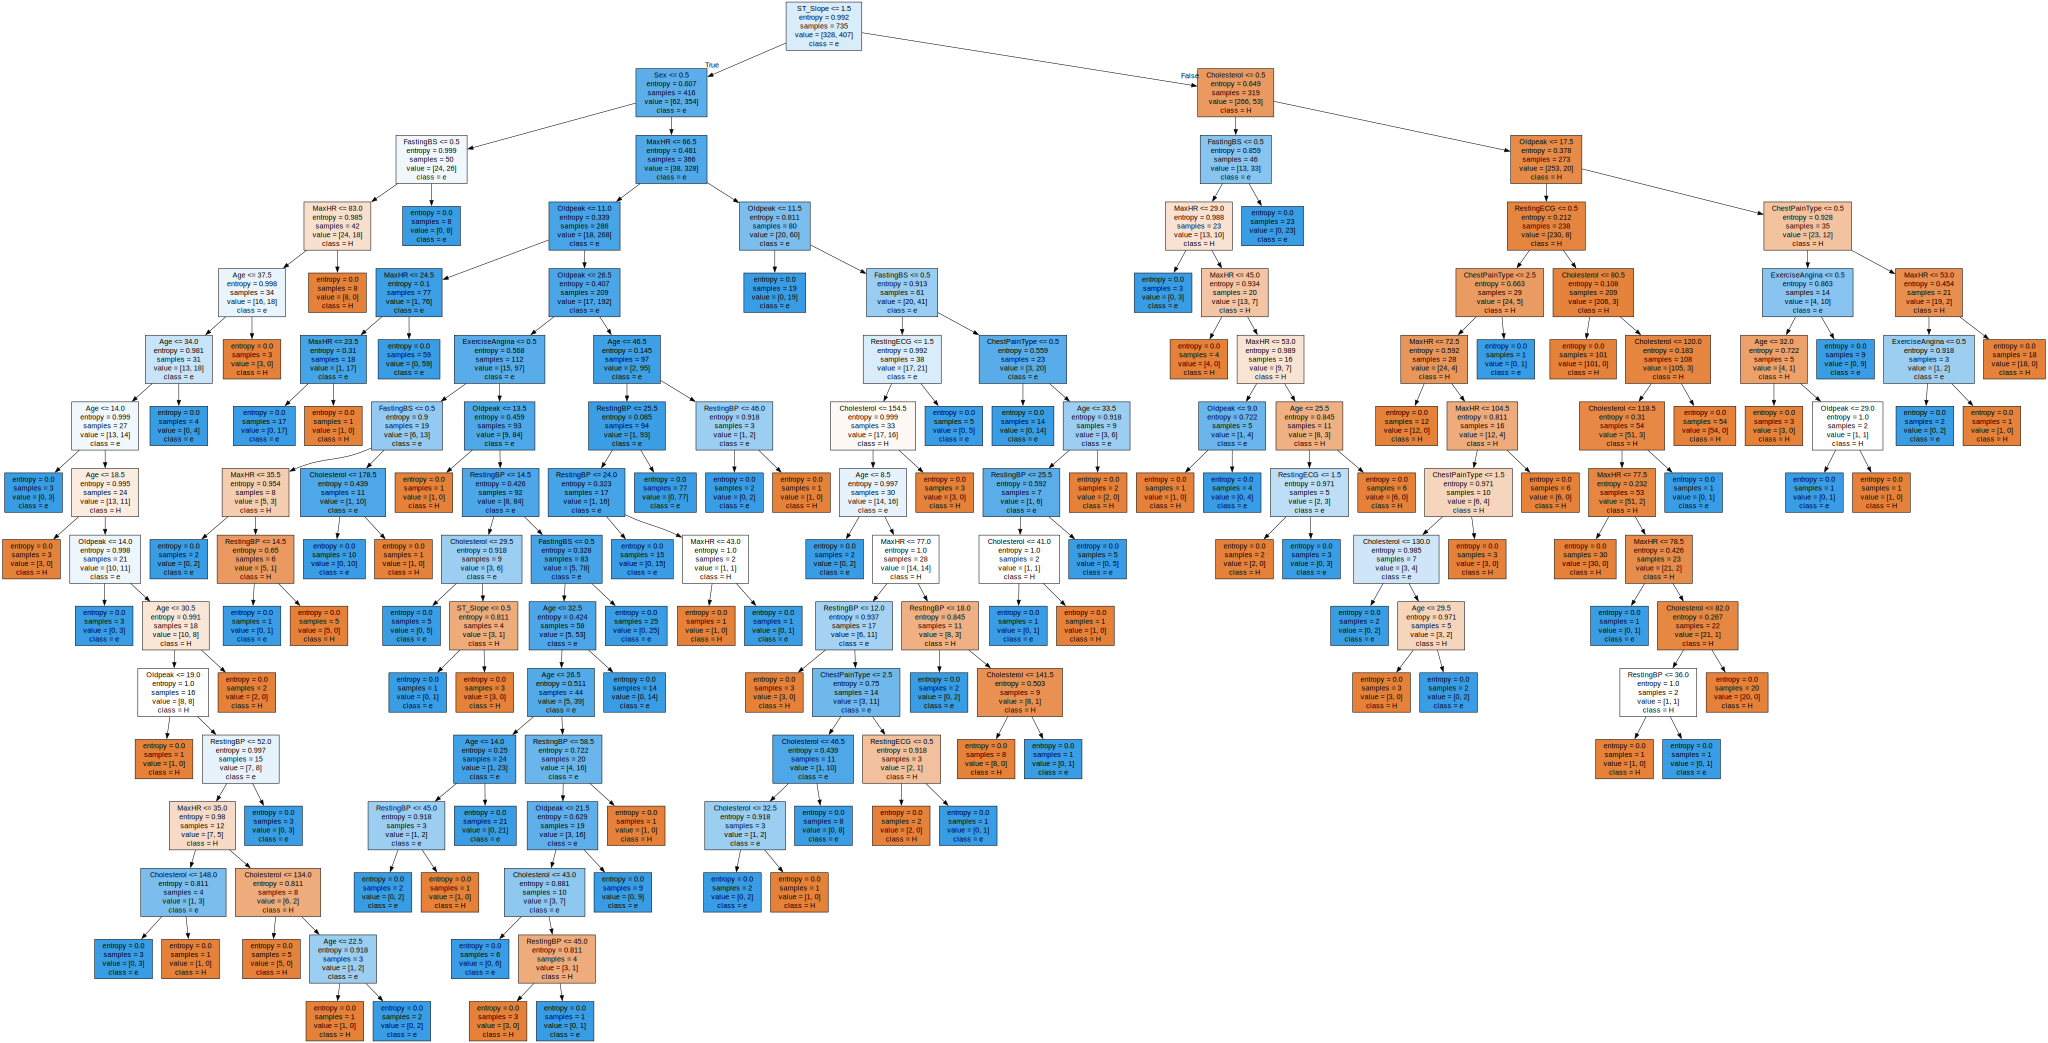

In [38]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=target,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>Using Random Forest Classifier</h2>
    <p>Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.</p>
    <img src="https://miro.medium.com/max/5752/1*5dq_1hnqkboZTcKFfwbO9A.png" width="70%">
    <p>The fundamental concept behind random forest is a simple but powerful one — the wisdom of crowds. In data science speak, the reason that the random forest model works so well is:</p>
    <blockquote>
      <p>A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.</p>
    </blockquote>
    <p>The low correlation between models is the key. Just like how investments with low correlations (like stocks and bonds) come together to form a portfolio that is greater than the sum of its parts, uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors (as long as they don’t constantly all err in the same direction). While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.</p>
  </div>
</div>


In [39]:
from sklearn.ensemble import RandomForestClassifier
acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")



The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        82
           1       0.94      0.85      0.89       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184

The accuracy for 1 : 0.8898852223816357
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        82
           1       0.91      0.80      0.85       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

The accuracy for 2 : 0.8531802965088474
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.98      0.63      0.77        82
           1       0.77      0.99      0.87       102

    accuracy                           0.83  

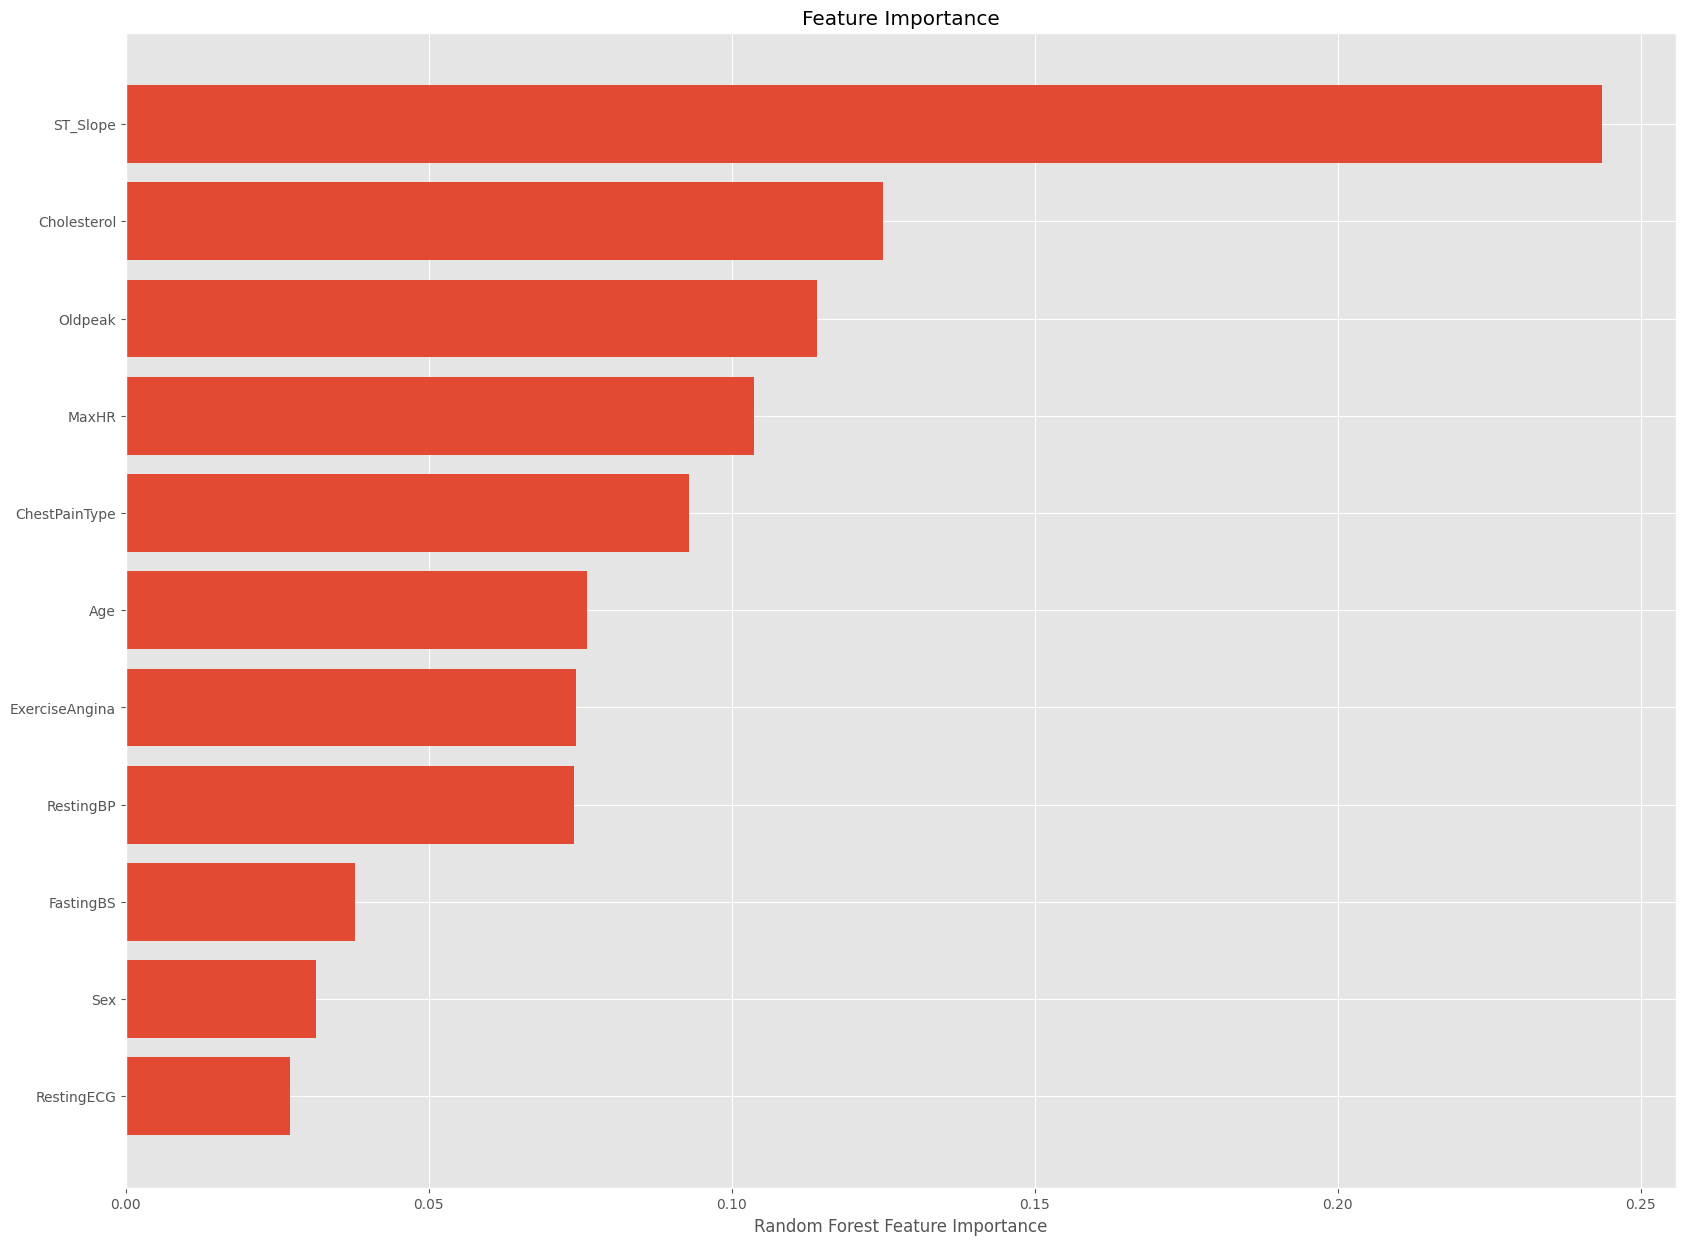

In [40]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h2>Using XGBoost</h2>
    <p>Unlike many other algorithms, XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.</p>
    <p>Just like in Random Forests, XGBoost uses Decision Trees as base learners:</p>
    <img src="https://miro.medium.com/max/492/1*FLshv-wVDfu-i54OqvZdHg.png">
    <p>However, the trees used by XGBoost are a bit different than traditional decision trees. They are called CART trees (Classification and Regression trees) and instead of containing a single decision in each “leaf” node, they contain real-value scores of whether an instance belongs to a group. After the tree reaches max depth, the decision can be made by converting the scores into categories using a certain threshold.</p>
  </div>
</div>


In [41]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.83      0.93      0.87        82
           1       0.93      0.84      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.88      0.88       184

The accuracy for 1 : 0.884983261597322
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.77      0.91      0.84        82
           1       0.92      0.78      0.85       102

    accuracy                           0.84       184
   macro avg       0.85      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

The accuracy for 2 : 0.8494739359158296
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.96      0.61      0.75        82
           1       0.76      0.98      0.85       102

    accuracy                           0.82   

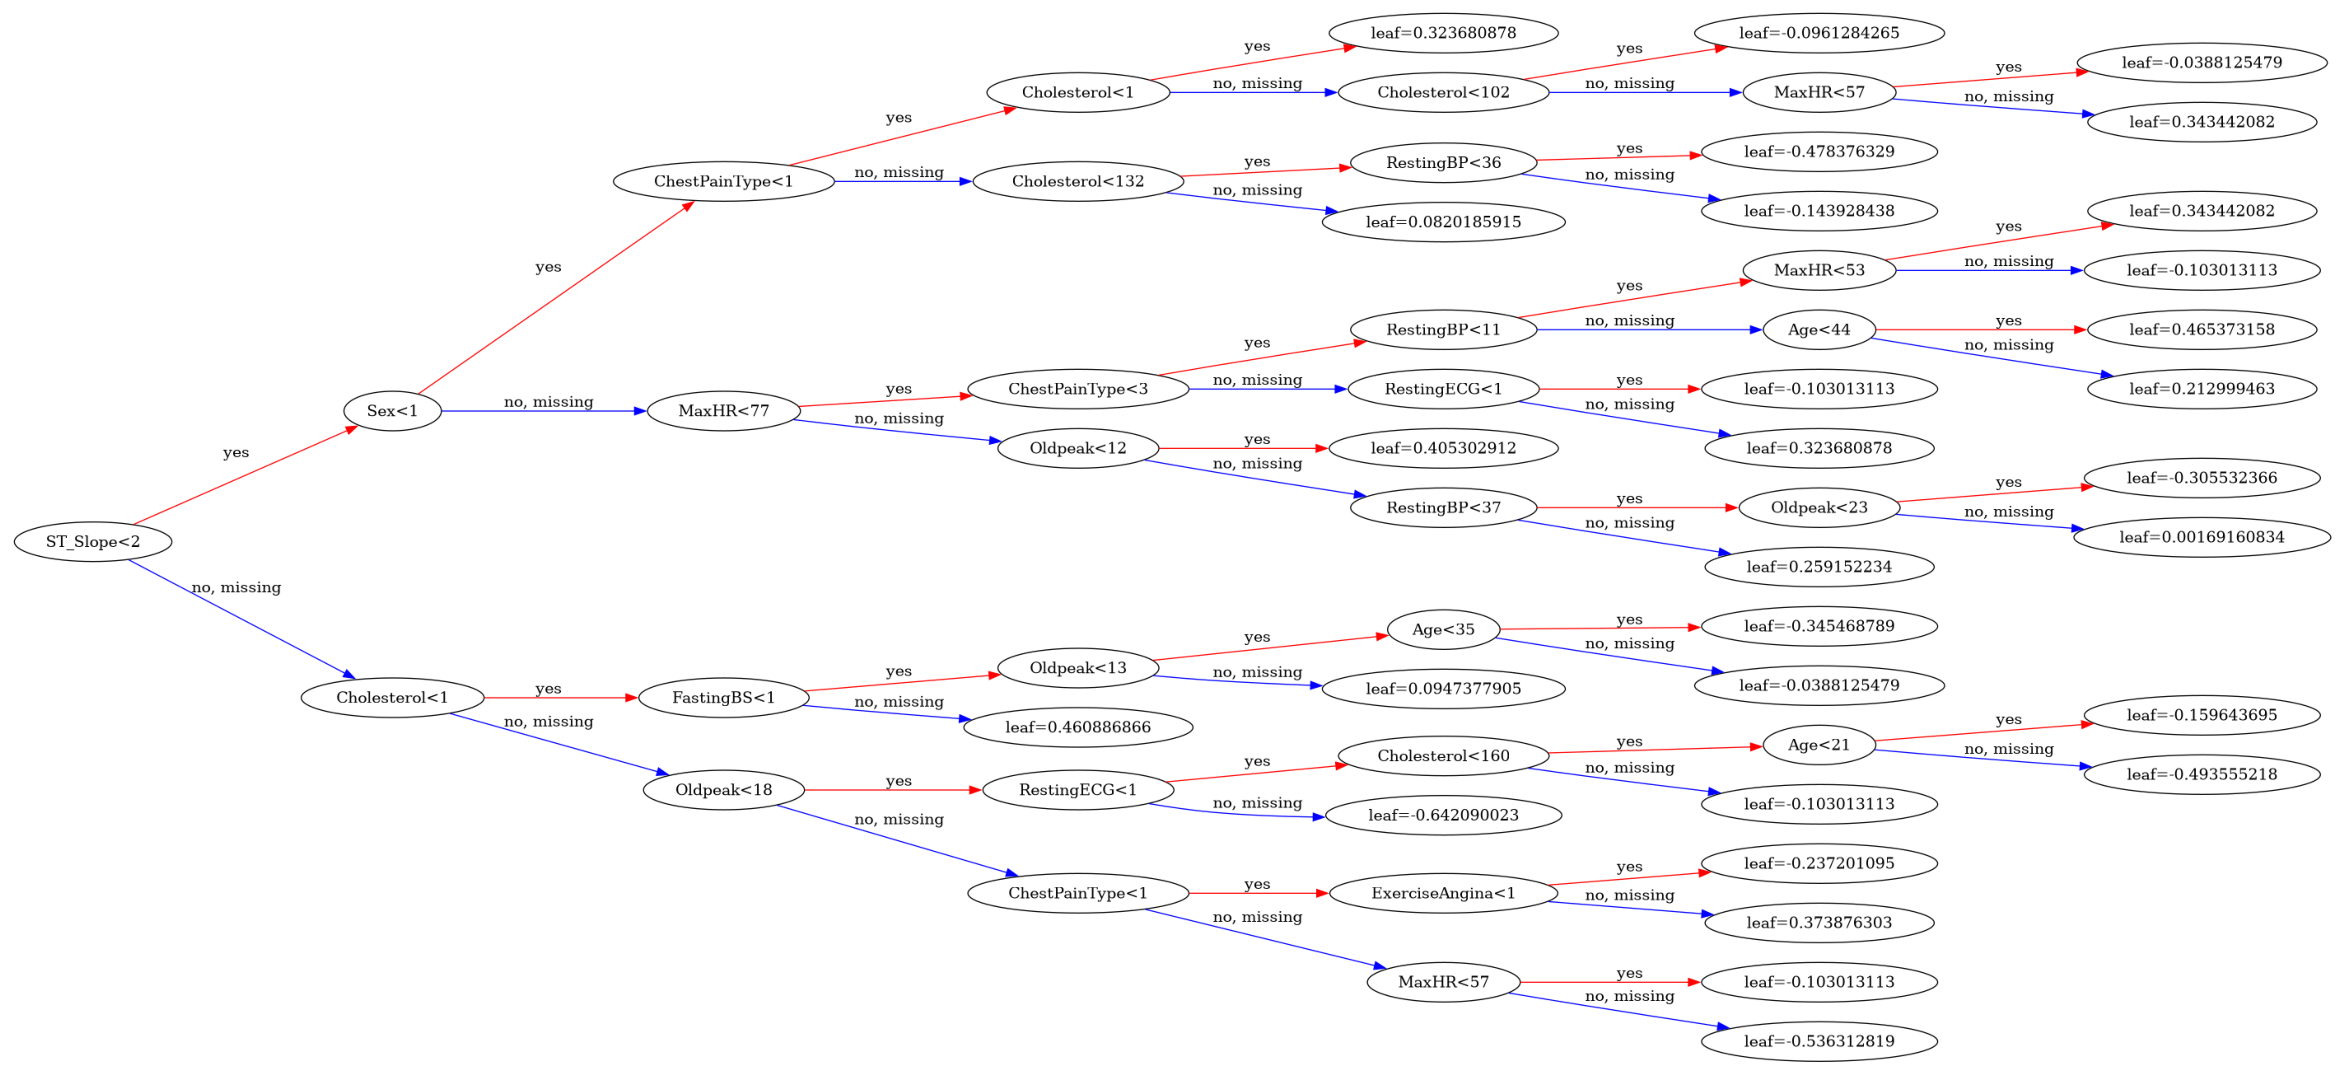

In [42]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()

<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #17a2b8; background-color: #d1ecf1;">
    <h1>Choosing the best Evaluation Matrix:</h1>
    <p>If we talk about classification problems, the most common metrics used are:</p>
    <ul>
      <li>Accuracy</li>
      <li>Precision (P)</li>
      <li>Recall (R)</li>
      <li>F1 score (F1)</li>
      <li>Area under the ROC (Receiver Operating Characteristic) curve or simply AUC (AUC):
        <ul>
          <li>If we calculate the area under the ROC curve, we are calculating another metric which is used very often when you have a dataset which has skewed binary targets. This metric is known as the Area Under ROC Curve or Area Under Curve or just simply AUC. There are many ways to calculate the area under the ROC curve.</li>
          <li>AUC is a widely used metric for skewed binary classification tasks in the industry, and a metric everyone should know about.</li>
        </ul>
      </li>
      <li>Log loss:
        <blockquote>Log Loss = - 1.0 * ( target * log(prediction) + (1 - target) * log(1 - prediction) )</blockquote>
      </li>
    </ul>
    <p>Most of the metrics that we discussed until now can be converted to a multi-class version. The idea is quite simple. Let’s take precision and recall. We can calculate precision and recall for each class in a multi-class classification problem:</p>
    <ul>
      <li><strong>Micro averaged precision:</strong> calculate precision for all classes individually and then average them</li>
      <li><strong>Micro averaged precision:</strong> calculate class-wise true positive and false positive and then use that to calculate overall precision</li>
      <li><strong>Weighted precision:</strong> same as macro but in this case, it is weighted average depending on the number of items in each class</li>
    </ul>
    <img src="https://cdn-images-1.medium.com/max/800/1*1WPbfzztdv50V22TpA6njw.png" alt="Evaluation Metrics">
  </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div class="alert alert-block alert-info" style="margin: 20px; padding: 20px; border-radius: 10px; border: 2px solid #6f42c1; background-color: #f3e8ff;">
    <h1>Thanks for reading till the end !</h1>
    <p>If you liked the notebook, please do Upvote👍 and feel free to give some remarks/advice if you feel some things need to be added. 😁😁😁</p>
  </div>
</div>
